<b>Import our libraries</b>

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<b> Read in and examine data</b>

In [15]:
df = pd.read_csv('vgchartz-2024.csv')

In [16]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


<b>Remove 'img' or 'last_update' / 'release_date' to datetime</b>

In [18]:
columns_to_drop = ['img', 'last_update']
df.drop(columns=columns_to_drop, inplace=True)

In [19]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         64016 non-null  object        
 1   console       64016 non-null  object        
 2   genre         64016 non-null  object        
 3   publisher     64016 non-null  object        
 4   developer     63999 non-null  object        
 5   critic_score  6678 non-null   float64       
 6   total_sales   18922 non-null  float64       
 7   na_sales      12637 non-null  float64       
 8   jp_sales      6726 non-null   float64       
 9   pal_sales     12824 non-null  float64       
 10  other_sales   15128 non-null  float64       
 11  release_date  56965 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 5.9+ MB


<b>Extract month and day for future analysis</b>

In [21]:
df['release_day'] = df['release_date'].dt.day_name()
df['release_month'] = df['release_date'].dt.month_name()

In [22]:
df.head(10)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_day,release_month
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,Tuesday,September
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,Tuesday,November
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,Monday,October
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,Tuesday,September
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,Friday,November
5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,Tuesday,November
6,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,Tuesday,November
7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,Friday,October
8,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,Tuesday,November
9,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,Tuesday,November


<b>Plot of typical release days</b>

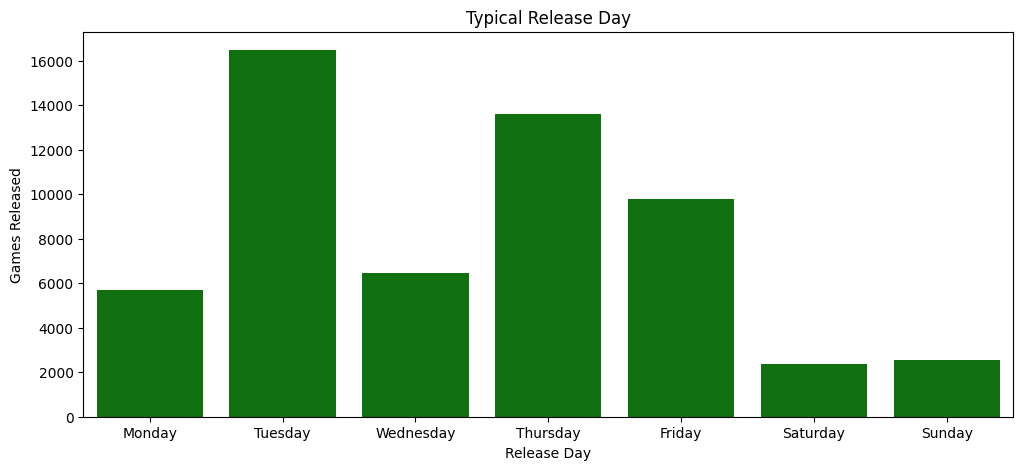

In [23]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(12,5))
sns.countplot(x = 'release_day',data= df, order=day_order, color='green')

plt.title('Typical Release Day')
plt.xlabel('Release Day')
plt.ylabel('Games Released')
plt.show()

<b>Plot of typical release months</b>

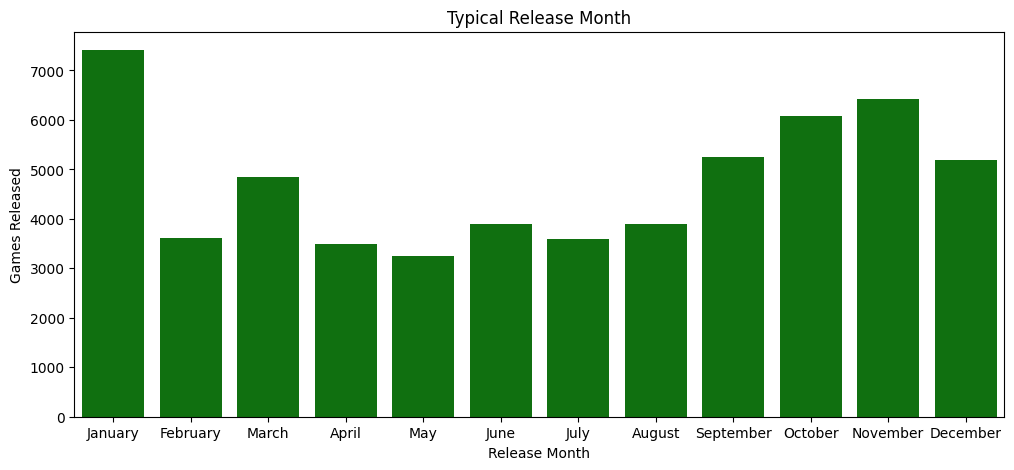

In [24]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,5))
sns.countplot(x = 'release_month',data= df, order=months_order, color='green')

plt.title('Typical Release Month')
plt.xlabel('Release Month')
plt.ylabel('Games Released')
plt.show()

<b>Plot of typical release quarter</b>

In [25]:
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}

df['release_quarter'] = df['release_month'].map(month_to_quarter)
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_day,release_month,release_quarter
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,Tuesday,September,Q3
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,Tuesday,November,Q4
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,Monday,October,Q4
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,Tuesday,September,Q3
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,Friday,November,Q4


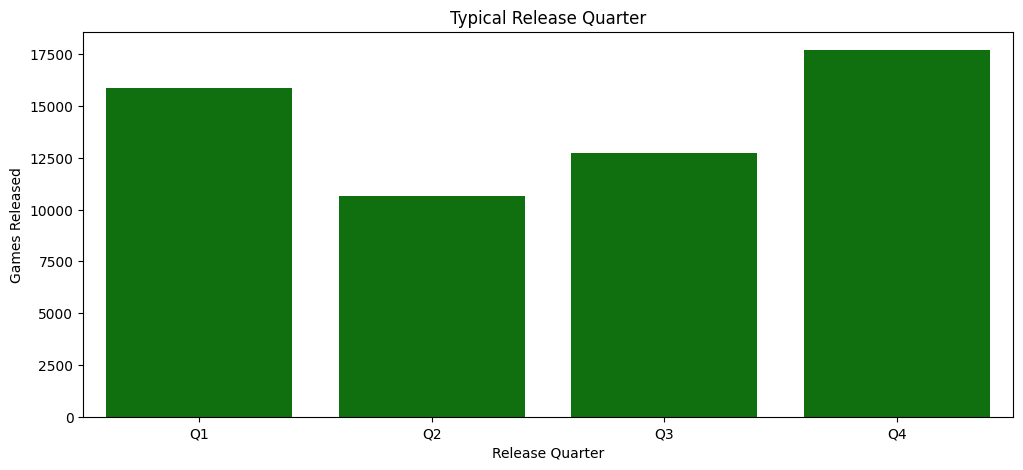

In [26]:
quarter_order = ['Q1','Q2','Q3','Q4']

plt.figure(figsize=(12,5))
sns.countplot(x = 'release_quarter',data= df, order=quarter_order, color='green')

plt.title('Typical Release Quarter')
plt.xlabel('Release Quarter')
plt.ylabel('Games Released')
plt.show()